## Lab 3.4: Time Series Part 2, Forecasting
### 1. Basic Forecasting with ACF and PACF

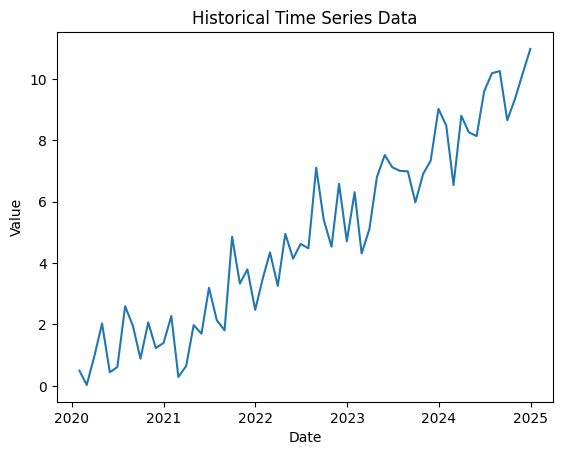

Forecasted Values:
2025-01-31    10.223486
2025-02-28    10.273464
2025-03-31    10.270143
2025-04-30    10.270363
2025-05-31    10.270349
Freq: ME, Name: predicted_mean, dtype: float64


/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

data = pd.read_csv('data/sample_time_series_data.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# plotting historical data
plt.plot(data)
plt.title("Historical Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

# ARIMA model
model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()

# fitting a forecasting model
forecast = model_fit.forecast(steps=5)
print("Forecasted Values:")
print(forecast)


p-value: 0.9963003247347144


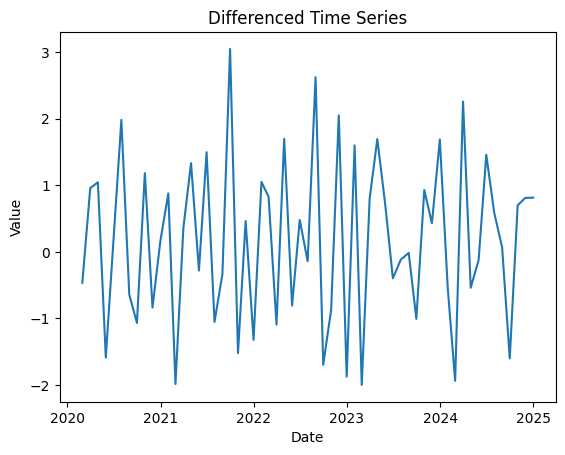

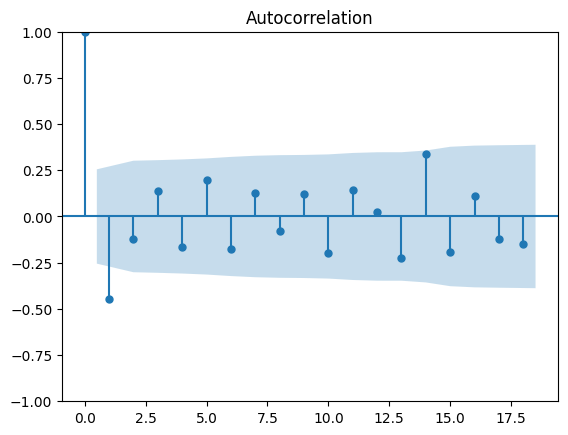

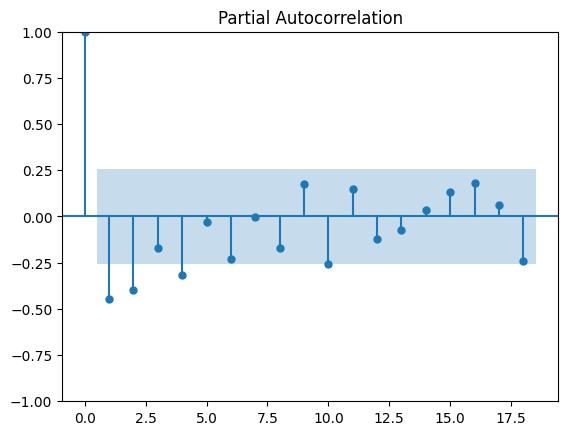

In [11]:
# preparing for ACF and PACF

# checking if p-value is greater than 0.05
result = adfuller(data)
print(f'p-value: {result[1]}')

# applying differencing since p is greater than 0.05
data_diff = data.diff().dropna()

# plot differenced time series
plt.plot(data_diff)
plt.title("Differenced Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

# plotting acf and pacf
plot_acf(data_diff)
plt.show()

plot_pacf(data_diff)
plt.show()

### 2. Identifying Seasonality with ACF and PACF

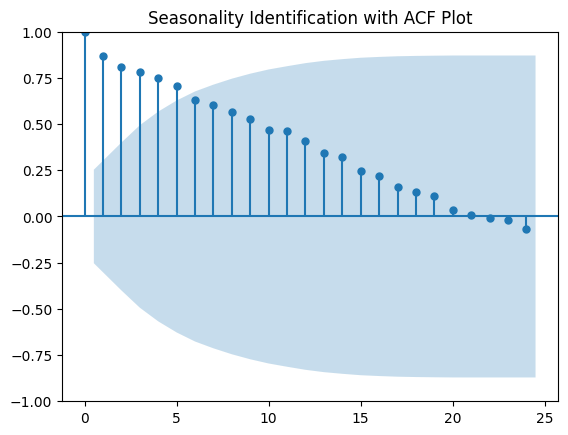

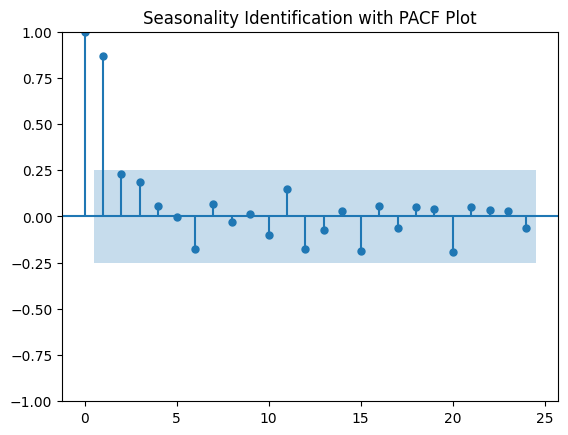

/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


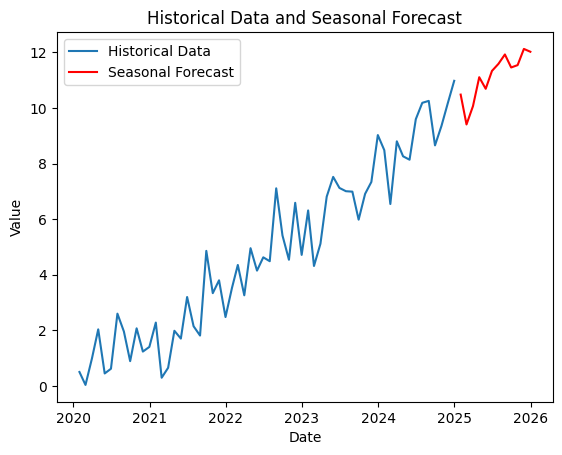

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# acf and pacf with seasonal lags
plot_acf(data, lags=24)
plt.title("Seasonality Identification with ACF Plot")
plt.show()

plot_pacf(data, lags=24)
plt.title("Seasonality Identification with PACF Plot")
plt.show()

# using a seasonal model
seasonal_model = SARIMAX(data, order=(1,1,1), seasonal_order=(1,1,1,12))
seasonal_model_fit = seasonal_model.fit(disp=False)

# plotting and forecasting with seasonal model
seasonal_model_forecast = seasonal_model_fit.forecast(steps=12)
plt.plot(data, label="Historical Data")
plt.plot(seasonal_model_forecast, label="Seasonal Forecast", color='red')
plt.title("Historical Data and Seasonal Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

### 3. ACF and PACF Interpretation for Model Selection
As seen below, ACF tails off but PACF cuts off abruptly after a small lag. This is a good indicator to use an AR model.

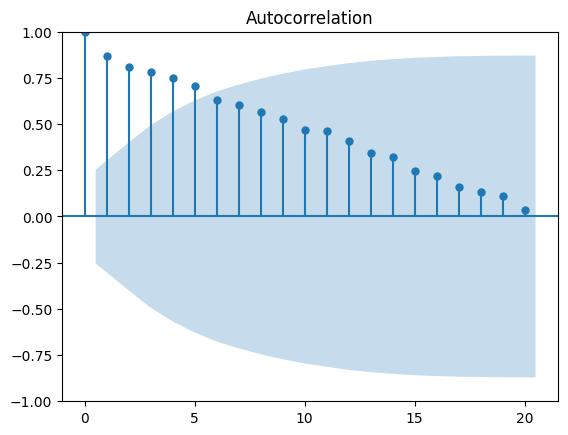

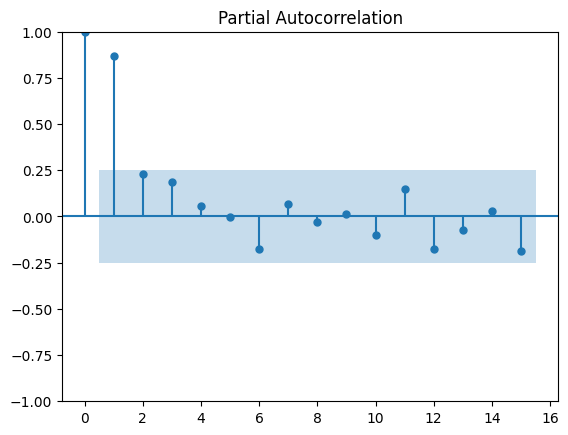

/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


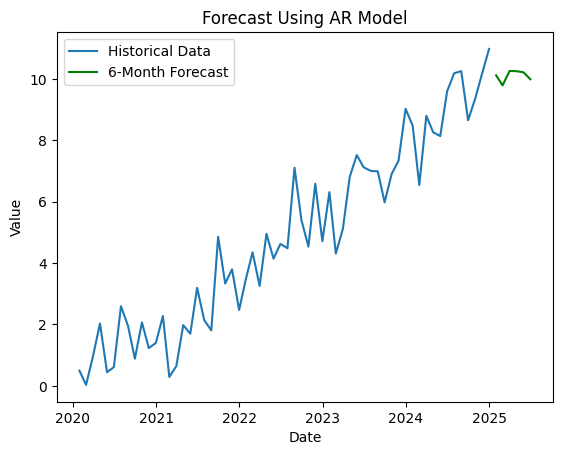

In [27]:
# plotting acf and pacf
plot_acf(data, lags=20)
plt.show()

plot_pacf(data, lags=15)
plt.show()

# using AR model based on interpretation
ar_model = ARIMA(data, order=(6,0,0))
ar_model_fit = ar_model.fit()

# forecasting
ar_model_forecast = ar_model_fit.forecast(steps=6)
plt.plot(data, label="Historical Data")
plt.plot(ar_model_forecast, label="6-Month Forecast", color='green')
plt.title("Forecast Using AR Model")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

### 4. Investigating Data Dependence Using PACF
As seen below, the PACF graph shows only one significant lag at lag = 2, so I've changed the p-value to 2.

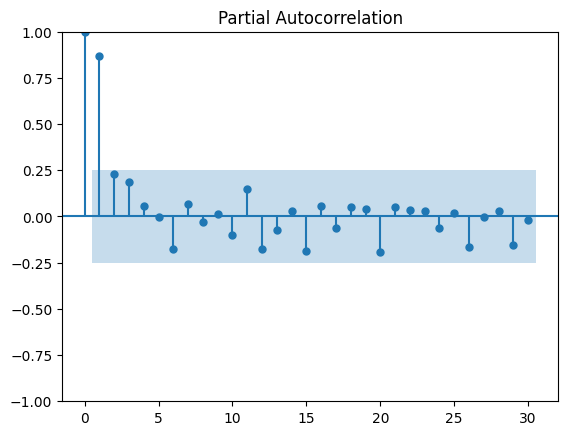

/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


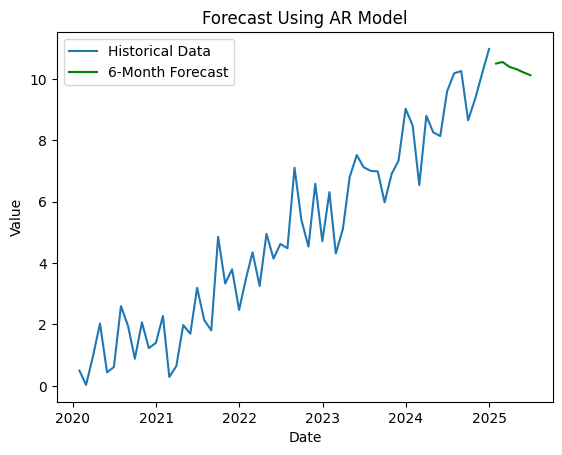

In [40]:
# pacf plot to identify significant lags
plot_pacf(data, lags=30)
plt.show()

# using AR model for 6 months 
ar_model = ARIMA(data, order=(2,0,0))
ar_model_fit = ar_model.fit()

# forecasting
ar_model_forecast = ar_model_fit.forecast(steps=6)
plt.plot(data, label="Historical Data")
plt.plot(ar_model_forecast, label="6-Month Forecast", color='green')
plt.title("Forecast Using AR Model")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()